세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 홀드아웃 데이터에서 모델의 성능이 몇 번의 에포크 후에 최고치에 다다랐다가 감소되기 시작했습니다. 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작합니다. 과대적합은 모든 머신 러닝 문제에서 발생합니다. 머신 러닝을 마스터하려면 과대적합을 다루는 방법을 꼭 배워야 합니다.

머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기입니다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다(머신 러닝의 학습). 반면 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미합니다. 물론 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것입니다. 하지만 일반화 성능을 제어할 방법이 없습니다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있습니다.

과대적합 해결
- 더 많은 훈련 데이터
- 정보의 양을 조절하거나 저장할 수 있는 정보에 제약
- 파리미터 수가 적은 모델 선택(단순한 모델)
- 훈련 데이터의 특성 수 축소
- 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록 함
- 훈련데이터의 잡음을 줄인다(오류데이터 수정하고 이상치 제거)

과소적합 해결
- 더 복잡한 모델 선택
- 훈련데이터의 특성을 더 선택
- 모델의 제약을 줄인다.


In [2]:
# num_words=10000은 훈련데이터에서 가장 자주 나타나는 단어 10000개만 사용한다는 의미
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')

(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
import numpy as np
def vectorize_sequnces(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence]=1 #result[i]에서 sequences가 있는 특정 인텍스의 위치를 1로 만든다.
  return results
# 훈련 데이터를 백터로 변환
x_train = vectorize_sequnces(train_data)
x_test=vectorize_sequnces(test_data)

In [4]:
y_train= np.asarray(train_label).astype('float32')
y_test=np.asarray(test_label).astype('float32')

In [5]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [6]:
# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [8]:
from keras.utils.data_utils import validate_file
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5884 - accuracy: 0.6337 - val_loss: 0.5216 - val_accuracy: 0.8092
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4587 - accuracy: 0.8582 - val_loss: 0.4823 - val_accuracy: 0.7994
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3814 - accuracy: 0.9197 - val_loss: 0.4089 - val_accuracy: 0.8751
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2712 - accuracy: 0.9422 - val_loss: 0.3085 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1776 - accuracy: 0.9532 - val_loss: 0.2902 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1342 - accuracy: 0.9609 - val_loss: 0.3213 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1038 - accuracy: 0.9726 - val_loss: 0.3294 - val_accuracy: 0.8766
Epoch 8/20
30

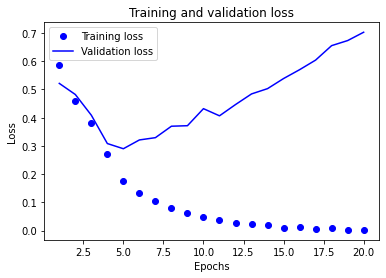

In [9]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

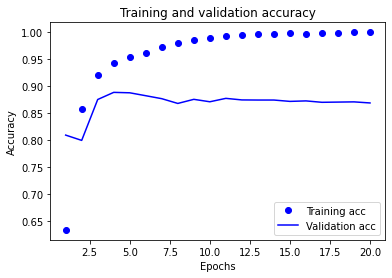

In [10]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

fig2 = plt.gcf()

plt.draw()
fig2.savefig('fig2.png', dpi=100)

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.4904 - accuracy: 0.7944
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2746 - accuracy: 0.9075
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2089 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2944 - accuracy: 0.8849
[0.2943711280822754, 0.8849200010299683]


In [ ]:
# 출력 유닛 6,1024,l2규제를 추가하여 그 효과를 설명

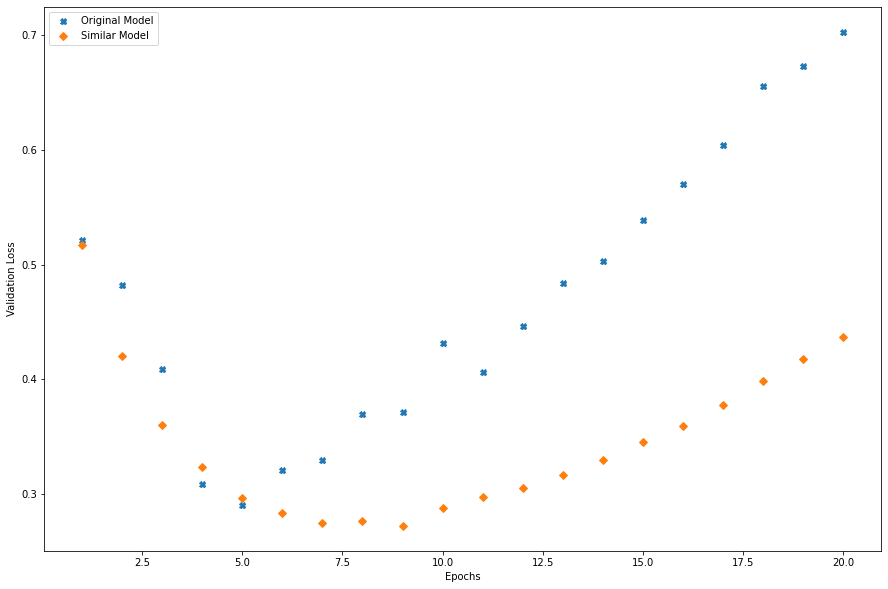

In [12]:
model = models.Sequential()
model.add(layers.Dense(6, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(6, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

epochs = 20
history_6 = model.fit(partial_x_train,
                      partial_y_train,
                      epochs = epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 0)


plt.figure(figsize = (15, 10))
plt.plot(range(1, epochs + 1), history.history['val_loss'], 'X', label = 'Original Model')
plt.plot(range(1, epochs + 1), history_6.history['val_loss'], 'D', label = 'Similar Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# 용량이 큰 네트워크는 첫 번째 에포크 이후 바로 과대적합이 시작외어 갈수록 더 심해진다.
# 검증 손실도 매우 불안정하다.

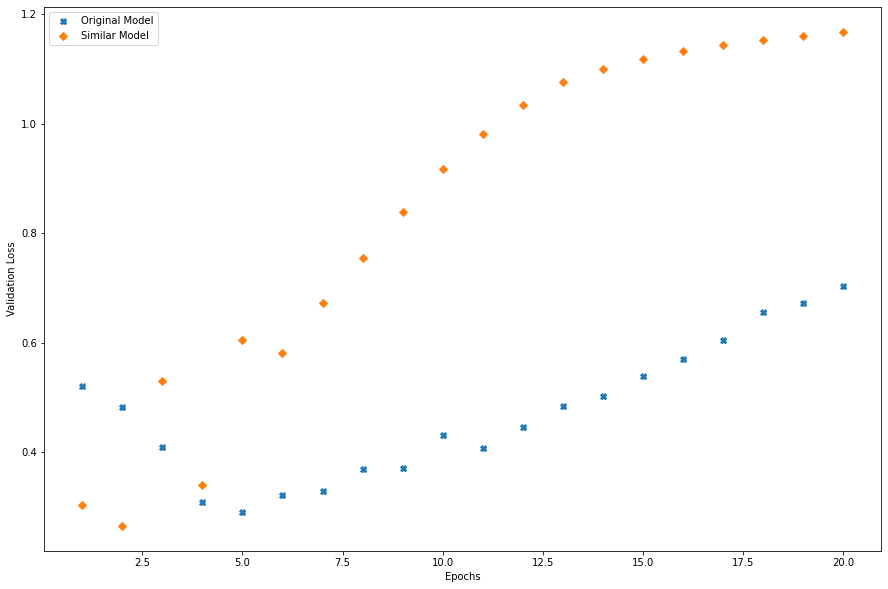

In [13]:
model = models.Sequential()
model.add(layers.Dense(1024, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

epochs = 20
history_6_temp = model.fit(partial_x_train,
                      partial_y_train,
                      epochs = epochs,
                      batch_size = 512,
                      validation_data = (x_val, y_val),
                      verbose = 0)


plt.figure(figsize = (15, 10))
plt.plot(range(1, epochs + 1), history.history['val_loss'], 'X', label = 'Original Model')
plt.plot(range(1, epochs + 1), history_6_temp.history['val_loss'], 'D', label = 'Similar Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# 용량이 큰 네트워크는 훈련 손실이 매우 빠르게 0에 가까워진다.
# 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링할 수 있다.
# 하지만 과대적합에 민감해진다.

Epoch 1/20
49/49 [==============================] - 3s 41ms/step - loss: 0.5157 - acc: 0.8111 - val_loss: 0.4058 - val_acc: 0.8730
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3298 - acc: 0.9032 - val_loss: 0.3409 - val_acc: 0.8883
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2779 - acc: 0.9176 - val_loss: 0.3577 - val_acc: 0.8733
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2521 - acc: 0.9266 - val_loss: 0.3343 - val_acc: 0.8860
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2362 - acc: 0.9335 - val_loss: 0.3662 - val_acc: 0.8735
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2299 - acc: 0.9360 - val_loss: 0.3462 - val_acc: 0.8819
Epoch 7/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2208 - acc: 0.9392 - val_loss: 0.3654 - val_acc: 0.8761
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2177 - a

ValueError: ignored

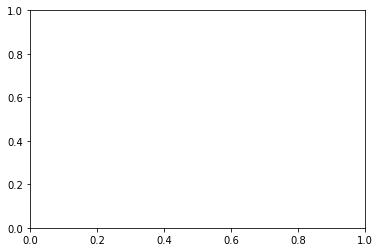

In [15]:
from tensorflow.keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))


l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, history.history['val_loss'], 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

Epoch 1/20
30/30 [==============================] - 19s 604ms/step - loss: 0.6590 - accuracy: 0.7330 - val_loss: 0.3129 - val_accuracy: 0.8800
Epoch 2/20
30/30 [==============================] - 18s 590ms/step - loss: 0.2704 - accuracy: 0.8919 - val_loss: 0.2912 - val_accuracy: 0.8809
Epoch 3/20
30/30 [==============================] - 18s 591ms/step - loss: 0.1642 - accuracy: 0.9381 - val_loss: 0.2696 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 18s 597ms/step - loss: 0.1034 - accuracy: 0.9711 - val_loss: 0.2788 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 18s 592ms/step - loss: 0.0073 - accuracy: 0.9995 - val_loss: 0.4577 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 18s 592ms/step - loss: 0.2408 - accuracy: 0.9786 - val_loss: 0.4473 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 18s 592ms/step - loss: 7.8903e-04 - accuracy: 1.0000 - val_loss: 0.5091 - val_accuracy: 0.

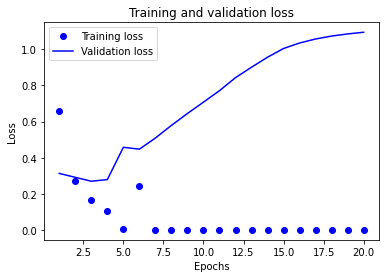

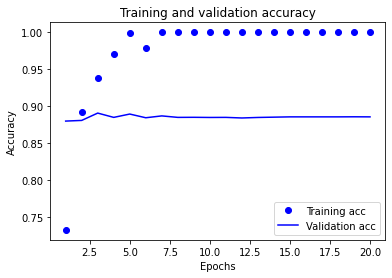

In [ ]:
go(1024)